<a href="https://colab.research.google.com/github/Tharusha-Sihan/BSP-Paper-Implementation/blob/main/ReducedFeature_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

In [ ]:
# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/BSP Paper Implementation/CSVs/Final Report/5EMD(0NaN)_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/BSP Paper Implementation/CSVs/Final Report/5EMD(0NaN)_test.csv')

In [ ]:
print(train_data.shape)
train_data.head()

(10000, 21)


,SV 1,CV 1,SEN 1,BP 1,SV 2,CV 2,SEN 2,BP 2,SV 3,CV 3,...,BP 3,SV 4,CV 4,SEN 4,BP 4,SV 5,CV 5,SEN 5,BP 5,Class
0,0.034266,19.518588,2.202298,0.016167,0.114112,23.075218,1.980630,0.013076,0.146247,33.248992,...,0.006441,0.039011,17.357557,1.777180,0.010528,0.003362,0.000436,1.067335,0.003797,0.0
1,0.078644,20.975992,3.837668,0.049092,0.110109,28.900085,6.112506,0.124542,0.061206,10.535010,...,0.031362,0.016904,0.457967,1.247735,0.005189,0.000000,0.000000,0.000000,0.000000,0.0
2,0.060394,8.217831,4.990102,0.083004,0.256496,19.039882,2.942276,0.028857,0.130847,234.542759,...,0.007515,0.003852,0.706292,1.416202,0.006685,0.000000,0.000000,0.000000,0.000000,0.0
3,0.032462,278.790854,1.304076,0.005669,0.103867,44.377950,2.567627,0.021976,0.112928,18.114723,...,0.035801,0.017689,42.761113,1.921471,0.012307,0.000000,0.000000,0.000000,0.000000,0.0
4,0.051219,9.194106,6.223070,0.129089,0.128199,30.734427,6.043127,0.121731,0.079586,6.286368,...,0.048207,0.009604,1.616811,2.609277,0.022694,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
print(test_data.shape)
test_data.head()

(2500, 21)


,SV 1,CV 1,SEN 1,BP 1,SV 2,CV 2,SEN 2,BP 2,SV 3,CV 3,...,BP 3,SV 4,CV 4,SEN 4,BP 4,SV 5,CV 5,SEN 5,BP 5,Class
0,0.031149,131.102120,2.014763,0.013531,0.220400,17.627420,3.691845,0.045432,0.128213,6.938928,...,0.024392,0.055976,12.974119,0.450583,0.000677,0.003305,0.535585,0.496304,0.000821,0.0
1,0.078901,2.243921,14.662826,0.716662,0.056746,3.490114,12.660076,0.534258,0.040905,7.075239,...,0.126344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.078605,54.801920,2.653935,0.023478,0.114750,383.581176,2.693198,0.024178,0.124571,23.408605,...,0.013311,0.008754,1.196696,1.329595,0.005893,0.000000,0.000000,0.000000,0.000000,0.0
3,0.079372,29.482795,2.214167,0.016342,0.113329,14900.582087,3.402051,0.038580,0.074298,17.227660,...,0.010557,0.002089,4722.510816,0.829612,0.002294,0.000000,0.000000,0.000000,0.000000,0.0
4,0.027141,753.570748,2.050427,0.014014,0.100507,198.451230,2.048804,0.013992,0.103359,844.523669,...,0.012621,0.047228,156.200684,1.915765,0.012234,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
labels_order = [
    "SEN 4", "BP 3", "SV 2", "SEN 3", "SEN 1", "SV 1", "SV 4", "SV 5", "BP 5",
    "BP 4", "BP 2", "BP 1", "CV 4", "CV 2", "CV 3", "SEN 5", "CV 5", "CV 1",
    "SEN 2", "SV 3", "Class"
]

train_data_reordered = train_data[labels_order]
test_data_reordered = test_data[labels_order]

In [ ]:
print(train_data_reordered.shape)
train_data_reordered.head()

(10000, 21)


,SEN 4,BP 3,SV 2,SEN 3,SEN 1,SV 1,SV 4,SV 5,BP 5,BP 4,...,BP 1,CV 4,CV 2,CV 3,SEN 5,CV 5,CV 1,SEN 2,SV 3,Class
0,1.777180,0.006441,0.114112,1.390101,2.202298,0.034266,0.039011,0.003362,0.003797,0.010528,...,0.016167,17.357557,23.075218,33.248992,1.067335,0.000436,19.518588,1.980630,0.146247,0.0
1,1.247735,0.031362,0.110109,3.067343,3.837668,0.078644,0.016904,0.000000,0.000000,0.005189,...,0.049092,0.457967,28.900085,10.535010,0.000000,0.000000,20.975992,6.112506,0.061206,0.0
2,1.416202,0.007515,0.256496,1.501514,4.990102,0.060394,0.003852,0.000000,0.000000,0.006685,...,0.083004,0.706292,19.039882,234.542759,0.000000,0.000000,8.217831,2.942276,0.130847,0.0
3,1.921471,0.035801,0.103867,3.277222,1.304076,0.032462,0.017689,0.000000,0.000000,0.012307,...,0.005669,42.761113,44.377950,18.114723,0.000000,0.000000,278.790854,2.567627,0.112928,0.0
4,2.609277,0.048207,0.128199,3.802888,6.223070,0.051219,0.009604,0.000000,0.000000,0.022694,...,0.129089,1.616811,30.734427,6.286368,0.000000,0.000000,9.194106,6.043127,0.079586,0.0


In [ ]:
print(test_data_reordered.shape)
test_data_reordered.head()

(2500, 21)


,SEN 4,BP 3,SV 2,SEN 3,SEN 1,SV 1,SV 4,SV 5,BP 5,BP 4,...,BP 1,CV 4,CV 2,CV 3,SEN 5,CV 5,CV 1,SEN 2,SV 3,Class
0,0.450583,0.024392,0.220400,2.705115,2.014763,0.031149,0.055976,0.003305,0.000821,0.000677,...,0.013531,12.974119,17.627420,6.938928,0.496304,0.535585,131.102120,3.691845,0.128213,0.0
1,0.000000,0.126344,0.056746,6.156555,14.662826,0.078901,0.000000,0.000000,0.000000,0.000000,...,0.716662,0.000000,3.490114,7.075239,0.000000,0.000000,2.243921,12.660076,0.040905,0.0
2,1.329595,0.013311,0.114750,1.998326,2.653935,0.078605,0.008754,0.000000,0.000000,0.005893,...,0.023478,1.196696,383.581176,23.408605,0.000000,0.000000,54.801920,2.693198,0.124571,0.0
3,0.829612,0.010557,0.113329,1.779625,2.214167,0.079372,0.002089,0.000000,0.000000,0.002294,...,0.016342,4722.510816,14900.582087,17.227660,0.000000,0.000000,29.482795,3.402051,0.074298,0.0
4,1.915765,0.012621,0.100507,1.945844,2.050427,0.027141,0.047228,0.000000,0.000000,0.012234,...,0.014014,156.200684,198.451230,844.523669,0.000000,0.000000,753.570748,2.048804,0.103359,0.0


In [ ]:
# Separate features and labels
X_train_full = train_data_reordered.drop(columns=["Class"])  # all columns except the "Class"
y_train = train_data["Class"]  # "Class" column

X_test_full = test_data_reordered.drop(columns=["Class"])  # all columns except the "Class"
y_test = test_data["Class"]  # "Class" column

# Normalize the entire dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Initialize an array to store accuracy values
accuracy_values = []

In [ ]:
# Incrementally train and test the SVM classifier
for i in range(1, X_train_scaled.shape[1] + 1):
    # Select the first i features from the pre-scaled datasets
    X_train = X_train_scaled[:, :i]
    X_test = X_test_scaled[:, :i]

    # Initialize and train the SVM classifier
    svm = SVC(kernel='rbf', C=100)
    svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svm.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

    # Print progress
    print(f"Finished training and testing with {i} features. Accuracy: {accuracy:.4f}")

Finished training and testing with 1 features. Accuracy: 0.2908
Finished training and testing with 2 features. Accuracy: 0.3732
Finished training and testing with 3 features. Accuracy: 0.4428
Finished training and testing with 4 features. Accuracy: 0.4472
Finished training and testing with 5 features. Accuracy: 0.4968
Finished training and testing with 6 features. Accuracy: 0.5720
Finished training and testing with 7 features. Accuracy: 0.6128
Finished training and testing with 8 features. Accuracy: 0.6052
Finished training and testing with 9 features. Accuracy: 0.6088
Finished training and testing with 10 features. Accuracy: 0.6128
Finished training and testing with 11 features. Accuracy: 0.6564
Finished training and testing with 12 features. Accuracy: 0.6560
Finished training and testing with 13 features. Accuracy: 0.6552
Finished training and testing with 14 features. Accuracy: 0.6520
Finished training and testing with 15 features. Accuracy: 0.6496
Finished training and testing with

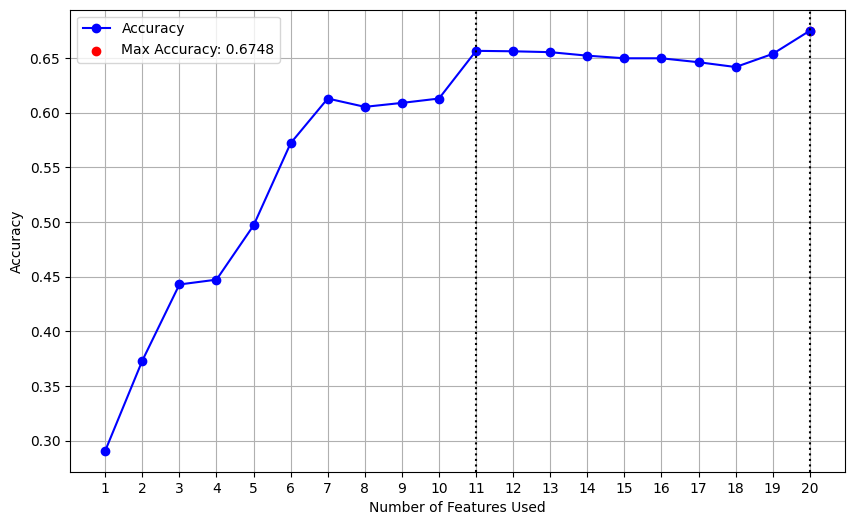

In [ ]:
# Find the maximum accuracy and its corresponding feature count
max_accuracy = max(accuracy_values)
max_feature_count = accuracy_values.index(max_accuracy) + 1  # Adjust for zero-based index

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o', linestyle='-', color='b', label="Accuracy")
# plt.title('Accuracy vs Number of Features')
plt.xlabel('Number of Features Used')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, len(accuracy_values) + 1))  # Ensures x-axis matches number of features

# Highlight the maximum point
plt.scatter(max_feature_count, max_accuracy, color='red', label=f"Max Accuracy: {max_accuracy:.4f}")
plt.axvline(x=max_feature_count, color='black', linestyle='dotted')
plt.axvline(x=11, color='black', linestyle='dotted')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
# Create the SVM model with a cubic kernel
svm_optimal = SVC(kernel='rbf', C=100)

# Train the model
svm_optimal.fit(X_train_scaled, y_train)

SVC(C=100)

In [ ]:
# Dataset and labels to make predictions and compare
model_pred = X_test_scaled
real_labels = y_test

# Optionally, evaluate the model on the "model_pred" data
y_pred = svm_optimal.predict(model_pred)

In [ ]:
# Print the evaluation metrics
print("Accuracy on Test Data: ", accuracy_score(real_labels, y_pred))
print("Classification Report:\n", classification_report(real_labels, y_pred))

Accuracy on Test Data:  0.6748
Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.63      0.61       500
         1.0       0.72      0.67      0.69       500
         2.0       0.71      0.65      0.68       500
         3.0       0.70      0.69      0.69       500
         4.0       0.66      0.74      0.70       500

    accuracy                           0.67      2500
   macro avg       0.68      0.67      0.68      2500
weighted avg       0.68      0.67      0.68      2500

